In this notebook, let's consider all the functionalities of langchain under the lense of how to be a more productive researcher.

# Leveraging Code Executionm

In [1]:
%pip install -qU langchain
%pip install langchain-core
%pip install langchain-community
%pip install langchain-experimental
%pip install langchain-openai
%pip install duckduckgo-search
%pip install xmltodict

In [2]:
import os
import getpass

# # Set OPENAI API Key

os.environ["OPENAI_API_KEY"] = getpass.getpass() 

# OR (load from .env file)

# from dotenv import load_dotenv
# load_dotenv("./.env")

True

In [48]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate    
from langchain.schema.output_parser import StrOutputParser
from langchain_experimental.utilities import PythonREPL

In [2]:
template = """Write some python code to solve the user's problem. 

Return only python code in Markdown format, e.g.:

```python
....
```"""
prompt = ChatPromptTemplate.from_messages([("system", template), ("human", "{input}")])

model = ChatOpenAI(model='gpt-4o-mini')

In [3]:
def _sanitize_output(text: str):
    _, after = text.split("```python")
    return after.split("```")[0]

In [4]:
chain = prompt | model | StrOutputParser() | _sanitize_output | PythonREPL().run

In [5]:
chain.invoke({"input": "whats 2 plus 2"})

Python REPL can execute arbitrary code. Use with caution.


'4\n'

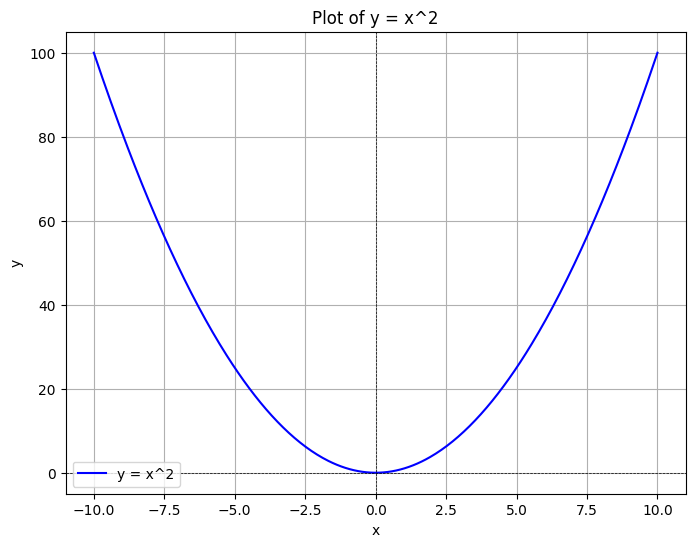

''

In [6]:
chain.invoke({"input": "Plot a graph of x squared"})

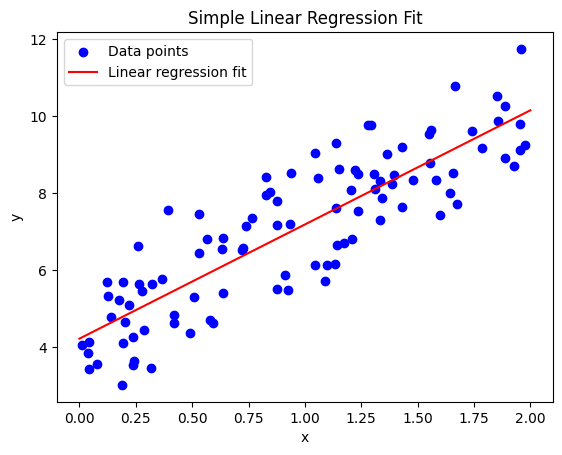

''

In [7]:
chain.invoke({"input": "Plot a simple linear regression fit over some toy example data, use numpy and not sklearn"})

# Automating Literature Review with LangChain

In [31]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

In [32]:
from langchain import hub
from langchain.agents import AgentExecutor, create_react_agent, load_tools
from langchain_openai import ChatOpenAI

tools = load_tools(
    ["arxiv"],
)
prompt = hub.pull("hwchase17/react")

agent = create_react_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [33]:
agent_executor.invoke(
    {
        "input": "Latest top 3 papers about Large Language Models",
    }
)



> Entering new AgentExecutor chain...
I need to find the latest research papers related to Large Language Models. I'll search for recent papers on arXiv that focus on this topic. 
Action: arxiv
Action Input: "Large Language Models" Published: 2023-06-12
Title: Lost in Translation: Large Language Models in Non-English Content Analysis
Authors: Gabriel Nicholas, Aliya Bhatia
Summary: In recent years, large language models (e.g., Open AI's GPT-4, Meta's LLaMa,
Google's PaLM) have become the dominant approach for building AI systems to
analyze and generate language online. However, the automated systems that
increasingly mediate our interactions online -- such as chatbots, content
moderation systems, and search engines -- are primarily designed for and work
far more effectively in English than in the world's other 7,000 languages.
Recently, researchers and technology companies have attempted to extend the
capabilities of large language models into languages other than English by
building

{'input': 'Latest top 3 papers about Large Language Models',
 'output': 'The latest top 3 papers about Large Language Models are:\n1. "Lost in Translation: Large Language Models in Non-English Content Analysis" (2023-06-12)\n2. "How Good are Commercial Large Language Models on African Languages?" (2023-05-11)\n3. "Cedille: A large autoregressive French language model" (2022-02-07)'}

To automate literature review with Langchain, you can use the PubMedRetriever and PubMedLoader modules. Here's how you can do it:

• Install the required packages:

In [34]:
# Import the necessary modules:
from langchain.retrievers import PubMedRetriever #for the PubMedRetriever module.
from langchain.document_loaders import PubMedLoader #for the PubMedLoader module.

In [35]:
#• Create an instance of the PubMedRetriever:

retriever = PubMedRetriever()

In [36]:
# Use the PubMedRetriever to get relevant documents based on a search query:
query = "neuroplasticity"
docs = retriever.invoke(query)
docs

[Document(metadata={'uid': '39180494', 'Title': 'An atlas of caspase cleavage events in differentiating muscle cells.', 'Published': '--', 'Copyright Information': '© 2024 The Author(s). Protein Science published by Wiley Periodicals LLC on behalf of The Protein Society.'}, page_content='Executioner caspases, such as caspase-3, are known to induce apoptosis, but in other contexts, they can control very different fates, including cell differentiation and neuronal plasticity. While hundreds of caspase substrates are known to be specifically targeted during cell death, we know very little about how caspase activity brings about non-apoptotic fates. Here, we report the first proteome identification of cleavage events in C2C12 cells undergoing myogenic differentiation and its comparison to undifferentiated or dying C2C12 cells. These data have identified new caspase substrates, including caspase substrates specifically associated with differentiation, and show that caspases are regulating p

In [37]:

# • Create an instance of the PubMedLoader:

loader = PubMedLoader(query)

# Load the documents using the PubMedLoader:

docs = loader.load()

In [38]:
# You can now access the loaded documents and their metadata:

docs #to access the metadata of the first document.

[Document(metadata={'uid': '39180494', 'Title': 'An atlas of caspase cleavage events in differentiating muscle cells.', 'Published': '--', 'Copyright Information': '© 2024 The Author(s). Protein Science published by Wiley Periodicals LLC on behalf of The Protein Society.'}, page_content='Executioner caspases, such as caspase-3, are known to induce apoptosis, but in other contexts, they can control very different fates, including cell differentiation and neuronal plasticity. While hundreds of caspase substrates are known to be specifically targeted during cell death, we know very little about how caspase activity brings about non-apoptotic fates. Here, we report the first proteome identification of cleavage events in C2C12 cells undergoing myogenic differentiation and its comparison to undifferentiated or dying C2C12 cells. These data have identified new caspase substrates, including caspase substrates specifically associated with differentiation, and show that caspases are regulating p

In [39]:
docs[0].page_content #to access the content of the first document.

#By using the PubMedRetriever and PubMedLoader modules, you can automate the process of retrieving and loading relevant literature for your literature review.

'Executioner caspases, such as caspase-3, are known to induce apoptosis, but in other contexts, they can control very different fates, including cell differentiation and neuronal plasticity. While hundreds of caspase substrates are known to be specifically targeted during cell death, we know very little about how caspase activity brings about non-apoptotic fates. Here, we report the first proteome identification of cleavage events in C2C12 cells undergoing myogenic differentiation and its comparison to undifferentiated or dying C2C12 cells. These data have identified new caspase substrates, including caspase substrates specifically associated with differentiation, and show that caspases are regulating proteins involved in myogenesis in myotubes, several days after caspase-3 initiated differentiation. Cytoskeletal proteins emerged as a major group of non-apoptotic caspase substrates. We also identified proteins with well-established roles in muscle differentiation as substrates cleaved 

In [40]:
len(docs)

3

In [44]:
from langchain_community.tools.pubmed.tool import PubmedQueryRun

In [45]:
tool = PubmedQueryRun()

In [47]:
tool.invoke("chatgpt")

'Published: 2024-08-24\nTitle: Utilizing Large Language Models in Ophthalmology: The Current Landscape and Challenges.\nCopyright Information: © 2024. The Author(s).\nSummary::\nA large language model (LLM) is an artificial intelligence (AI) model that uses natural language processing (NLP) to understand, interpret, and generate human-like language responses from unstructured text input. Its real-time response capabilities and eloquent dialogue enhance the interactive user experience in human-AI communication like never before. By gathering several sources on the internet, LLM chatbots can interact and respond to a wide range of queries, including problem solving, text summarization, and creating informative notes. Since ophthalmology is one of the medical fields integrating image analysis, telemedicine, AI, and other technologies, LLMs are likely to play an important role in eye care in the near future. This review summarizes the performance and potential applicability of LLMs in opht

With duck duck go search

In [49]:
import requests
from bs4 import BeautifulSoup
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain.chains.openai_functions.extraction import create_extraction_chain_pydantic
from langchain.agents import load_tools, AgentExecutor
import pandas as pd

In [50]:
def parse_html(content):
    soup = BeautifulSoup(content, 'html.parser')
    text_content_with_links = soup.get_text()
    return text_content_with_links

def fetch_web_page(url):
    response = requests.get(url)
    return parse_html(response.content)

In [51]:
tools = load_tools(["arxiv"])
prompt = hub.pull("hwchase17/react")
agent = create_react_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [57]:
output = agent_executor.invoke({"input": "Research 3 papers about large language models"})



> Entering new AgentExecutor chain...
I need to find recent research papers that focus on large language models. I'll search for relevant papers on arXiv to gather information on this topic. 
Action: arxiv
Action Input: "large language models"Published: 2023-06-12
Title: Lost in Translation: Large Language Models in Non-English Content Analysis
Authors: Gabriel Nicholas, Aliya Bhatia
Summary: In recent years, large language models (e.g., Open AI's GPT-4, Meta's LLaMa,
Google's PaLM) have become the dominant approach for building AI systems to
analyze and generate language online. However, the automated systems that
increasingly mediate our interactions online -- such as chatbots, content
moderation systems, and search engines -- are primarily designed for and work
far more effectively in English than in the world's other 7,000 languages.
Recently, researchers and technology companies have attempted to extend the
capabilities of large language models into languages other than English 

In [58]:
output

{'input': 'Research 3 papers about large language models',
 'output': '1. **Lost in Translation: Large Language Models in Non-English Content Analysis** by Gabriel Nicholas and Aliya Bhatia (2023-06-12) - This paper discusses the challenges and capabilities of multilingual language models, particularly in analyzing non-English content.\n\n2. **Cedille: A large autoregressive French language model** by Martin Müller and Florian Laurent (2022-02-07) - This research introduces Cedille, a large autoregressive language model specifically trained for French, and compares its performance with existing models, including its safety features.\n\n3. **How Good are Commercial Large Language Models on African Languages?** by Jessica Ojo and Kelechi Ogueji (2023-05-11) - This paper analyzes the performance of commercial large language models on African languages, highlighting their limitations and the need for better representation of these languages in NLP models.'}

In [63]:
# Define a Pydantic schema for your data (modify according to your data structure)
from langchain_core.pydantic_v1 import BaseModel, Field
from typing import List

class LiteratureData(BaseModel):
    """Extracts paper information from the output of an arxiv search."""
    titles: List[str] = Field(description='The titles of the papers referenced in the search result')
    abstracts: List[str] = Field(description='The abstracts of the papers referenced in the search result')
    citations: List[str] = Field(description='The citations of the papers referenced in the search result')
    

prompt = ChatPromptTemplate.from_messages([
    ('system', """
                You are an extraction engine for papers. You extract the following fields:
                - title
                - abstract
                - citation
                When users feed you data from papers, you extract these fields."""),
    ('user', '{input}')])

extraction_chain = prompt | llm.with_structured_output(LiteratureData)
extraction_chain

ChatPromptTemplate(input_variables=['input'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='\n                You are an extraction engine for papers. You extract the following fields:\n                - title\n                - abstract\n                - citation\n                When users feed you data from papers, you extract these fields.')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template='{input}'))])
| RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x1253519d0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x12535d190>, model_name='gpt-4o-mini', temperature=0.0, openai_api_key=SecretStr('**********'), openai_api_base='https://api.openai.com/v1', openai_proxy=''), kwargs={'tools': [{'type': 'function', 'function': {'name': 'LiteratureData', 'description': 'Extracts paper information from the output of an arxiv search.',

In [64]:
output_structured = extraction_chain.invoke(output['output'])
output_structured

LiteratureData(titles=['Lost in Translation: Large Language Models in Non-English Content Analysis', 'Cedille: A large autoregressive French language model', 'How Good are Commercial Large Language Models on African Languages?'], abstracts=['This paper discusses the challenges and capabilities of multilingual language models, particularly in analyzing non-English content.', 'This research introduces Cedille, a large autoregressive language model specifically trained for French, and compares its performance with existing models, including its safety features.', 'This paper analyzes the performance of commercial large language models on African languages, highlighting their limitations and the need for better representation of these languages in NLP models.'], citations=['Nicholas, G., & Bhatia, A. (2023). Lost in Translation: Large Language Models in Non-English Content Analysis. arXiv preprint arXiv:2306.01234.', 'Müller, M., & Laurent, F. (2022). Cedille: A large autoregressive French

In [66]:
import pandas as pd

# Create a dictionary with the lists as values

data = {
    "title": output_structured.titles,
    "abstract": output_structured.abstracts,
    "citation": output_structured.citations
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,title,abstract,citation
0,Lost in Translation: Large Language Models in ...,This paper discusses the challenges and capabi...,"Nicholas, G., & Bhatia, A. (2023). Lost in Tra..."
1,Cedille: A large autoregressive French languag...,"This research introduces Cedille, a large auto...","Müller, M., & Laurent, F. (2022). Cedille: A l..."
2,How Good are Commercial Large Language Models ...,This paper analyzes the performance of commerc...,"Ojo, J., & Ogueji, K. (2023). How Good are Com..."
